# **Proyecto Final Fundamentación en Computación**

## Introducción

#### ¿Por qué elegí esta base de datos?
> Esta no fue mi primera opción sin embargo la elegí ya que me resulta un tema bastante interesante y era una base de datos bastante completa. Y que se puede prestar para preguntas interesantes que pueden llevar a respuestas esclarecedoras.


#### ¿Qué espero encontrar en ella?
> En un primer momento al ver la amplitud de los datos en la misma pensé en revisar algo que me había planteado y que había leído en un par de artículos ¿Los intentos de suicidio aumentaron con la pandemia? Además de la cifra generalizada en la que se menciona que son los "hombres" quienes más se suicidan. Así mismo como dudas más generales referentes más hacia lo local como un análisis por comuna y/o grupo etario.
> Algo más que logré vislumbrar con una ojeada rápida y se me hizo asombroso, fue que la persona más pequeña en la base de datos poseía tan solo 5 años, ¿Qué puede llevar a un niñx con apenas uso de conciencia a buscar acabar con su vida?¿Qué clase de sociedad permite que estas cosas ocurran? Además, de que no era un único caso.

## Gráficos

### Importación de librerías

In [9]:
import pandas as pd
import plotly.express as px
from matplotlib import cm  ## mapa de colores
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
#importar librerías

### Método empleado con distinción por sexo

Text(0, 0.5, 'Cantidad de casos')

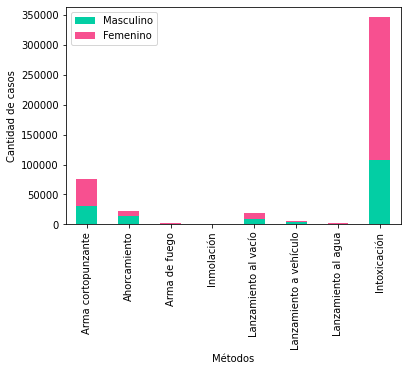

In [10]:
csv = pd.read_csv('http://medata.gov.co/node/24445/download',sep=";")
#leer el csv
df=pd.DataFrame(csv, index=csv["id"])
#primer dataframe con todos los datos
farma_corto=df[(df.arma_corto=="1")& (df.sexo_=="F")]
marma_corto=df[(df.arma_corto=="1")& (df.sexo_=="M")]
#Arma cortopunzante
fahorcamien=df[(df.ahorcamien=='1')& (df.sexo_=='F')]
mahorcamien=df[(df.ahorcamien=='1')& (df.sexo_=='M')]
#Ahorcamiento
farma_fuego=df[(df.arma_fuego=='1')& (df.sexo_=='F')]
marma_fuego=df[(df.arma_fuego=='1')& (df.sexo_=='M')]
#Arma de fuego
finmolacion=df[(df.inmolacion=='1')& (df.sexo_=='F')]
minmolacion=df[(df.inmolacion=='1')& (df.sexo_=='M')]
#Inmolación
flanz_vacio=df[(df.lanz_vacio=='1')& (df.sexo_=='F')]
mlanz_vacio=df[(df.lanz_vacio=='1')& (df.sexo_=='M')]
#Lanzamiento al vacío
flanz_vehic=df[(df.lanz_vehic=='1')& (df.sexo_=='F')]
mlanz_vehic=df[(df.lanz_vehic=='1')& (df.sexo_=='M')]
#Lanzamiento a vehículo
flanz_agua=df[(df.lanz_agua=='1')& (df.sexo_=='F')]
mlanz_agua=df[(df.lanz_agua=='1')& (df.sexo_=='M')]
#Lanzamiento al agua
fintoxicaci=df[(df.intoxicaci=='1')& (df.sexo_=='F')]
mintoxicaci=df[(df.intoxicaci=='1')& (df.sexo_=='M')]
#Intoxicación
#filtrar datos según sexo y método empleado

método=["Arma cortopunzante","Ahorcamiento","Arma de fuego","Inmolación","Lanzamiento al vacío","Lanzamiento a vehículo","Lanzamiento al agua","Intoxicación"]
#Lista de métodos
masculino=[(marma_corto.size),(mahorcamien.size)
,(marma_fuego.size)
,(minmolacion.size)
,(mlanz_vacio.size)
,(mlanz_vehic.size)
,(mlanz_agua.size)
,(mintoxicaci.size)]
#Lista con la cantidad de casos de sexo masculino por método
#((marma_corto.size*100)/(df.size)),((mahorcamien.size*100)/(df.size)),((marma_fuego.size*100)/(df.size)),((minmolacion.size*100)/(df.size)),((mlanz_vacio.size*100)/(df.size)),((mlanz_vehic.size*100)/(df.size)),((mlanz_agua.size*100)/(df.size)),((mintoxicaci.size*100)/(df.size))
#porcentaje del total de hombres x método
#otra posibilidad con los porcentajes
femenino=[(farma_corto.size),(fahorcamien.size)
,(farma_fuego.size)
,(finmolacion.size)
,(flanz_vacio.size)
,(flanz_vehic.size)
,(flanz_agua.size)
,(fintoxicaci.size)]
#Lista con la cantidad de casos de sexo femenino por método
#     ((farma_corto.size*100)/(df.size)),((fahorcamien.size*100)/(df.size)),((farma_fuego.size*100)/(df.size)),((finmolacion.size*100)/(df.size)) ,((flanz_vacio.size*100)/(df.size)) ,((flanz_vehic.size*100)/(df.size)) ,((flanz_agua.size*100)/(df.size)),((fintoxicaci.size*100)/(df.size))]
#porcentaje del total de mujeres x método

new_df=pd.DataFrame({"Masculino":masculino,"Femenino":femenino},index=método)
gráfico=new_df.plot.bar(stacked=True,color={"Masculino":"#03CEA4","Femenino":"#F75090"})
gráfico.set_xlabel('Métodos')
gráfico.set_ylabel('Cantidad de casos')
#gráfico 

### Treemap que relaciona Sexo, Edad y Año

In [11]:
csv = pd.read_csv('http://medata.gov.co/node/24445/download',sep=";")
df=pd.DataFrame(csv, index=csv["id"])
df.drop(columns=["id","cod_ase_","pac_hos_","evento","year_"])
df.dropna(inplace=True)
#dataframe y filtro de columnas innecesarias
df["fec_con_"]=df["fec_con_"].str.slice(start=6)
#separación del año respecto a la fecha
fig=px.treemap(df,path=["fec_con_","sexo_"],color="edad_",color_continuous_scale=["#FF8360","#E8E288","#7DCE82","#3CDBD3"],title="Relación entre edad y sexo por año")
#Gráfico treemap interactivo
#"#9FC088","#E8C07D","#CC704B","#614124" #naranjas
#"#FF8360","#E8E288","#7DCE82","#3CDBD3" #verdes
#Posibles paletas de colores
fig.show()
#Regresar gráfica

C:\Users\Equipo\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Equipo\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Diagrama de Dispersión Edad, Nivel de escolaridad y Estado cívil

Text(0.83, -0.1, '1= Preescolar\n2= Básica primaria\n3= Básica secundaria\n5= Media técnica\n7= Técnica profesional\n8= Tecnológica o técnica\n9= Profesional\n10= Especialización\n11= Maestría\n12= Doctorado\n13= Ninguno\n14= Sin información.')

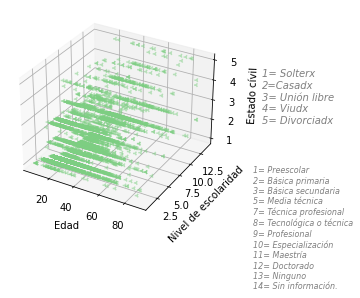

In [12]:
csv = pd.read_csv('http://medata.gov.co/node/24445/download',sep=";")
df=pd.DataFrame(csv, index=csv["id"])
#crear dataframe de la base de datos
df=df.drop([15709])
#Eliminar columna adicional accidental creada por el index extraño
df=df.loc[(df.estado_civ!='SD')]
df=df.loc[(df.escolarid!='SD')]
#filtrar para quitar las líneas sin información
df["escolarid"]=df["escolarid"].astype(float)
df["estado_civ"]=df["estado_civ"].astype(float)
df["edad_"]=df["edad_"].astype(float)
#volverlos flotantes para que sea más útiles a la hora de graficar
fig = plt.figure()
#crear figura
ax = fig.add_subplot(111, projection='3d')
# print(df["escolarid"])
# print(df["estado_civ"])
sc = ax.scatter(df["edad_"], df["escolarid"], df["estado_civ"],c="#7DCE82",marker="3",alpha=0.5)
#graficar variables
ax.set_xlabel("Edad")
ax.set_ylabel("Nivel de escolaridad")
ax.set_zlabel("Estado cívil")
#Agregar títulos
texto="1= Solterx\n2=Casadx\n3= Unión libre\n4= Viudx\n5= Divorciadx"
fig.text(0.85, 0.475,texto,fontstyle="oblique",c="gray")
fig.text(0.83,-0.1,"1= Preescolar\n2= Básica primaria\n3= Básica secundaria\n5= Media técnica\n7= Técnica profesional\n8= Tecnológica o técnica\n9= Profesional\n10= Especialización\n11= Maestría\n12= Doctorado\n13= Ninguno\n14= Sin información."
         ,fontstyle="oblique",c="gray",fontsize=8
         )
#Complementar con informacióna adicional

### Gráficas polares con una relación entre Comuna, Edad y semana

In [13]:
csv = pd.read_csv('http://medata.gov.co/node/24445/download',sep=";")
df=pd.DataFrame(csv, index=csv["id"])
#crear dataframe de la base de datos
###################################################################
Sininformacion=df[(df.comuna=='Sin informacion')]
VillaHermosa=df[(df.comuna=='Villa Hermosa')]
Laureles=df[(df.comuna=='Laureles')]
Belen=df[(df.comuna=='Belen')]
Castilla=df[(df.comuna=='Castilla')]
DocedeOctubre=df[(df.comuna=='Doce de Octubre')]
LaCandelaria=df[(df.comuna=='La Candelaria')]
SanJavier=df[(df.comuna=='San Javier')]
ElPoblado=df[(df.comuna=='El Poblado')]
SanAntoniodePrado=df[(df.comuna=='San Antonio de Prado')]
Popular=df[(df.comuna=='Popular')]
SantaCruz=df[(df.comuna=='Santa Cruz')]
Robledo=df[(df.comuna=='Robledo')]
CorregimientoDeSantaElena=df[(df.comuna=='Corregimiento De Santa Elena')]
CorregimientodeSanCristobal=df[(df.comuna=='Corregimiento de San Cristobal')]
BuenosAires=df[(df.comuna=='Buenos Aires')]
Manrique=df[(df.comuna=='Manrique')]
Altavista=df[(df.comuna=='Altavista')]
SININFORMACION=df[(df.comuna=='SIN INFORMACION')]
Guayabal=df[(df.comuna=='Guayabal')]
Aranjuez=df[(df.comuna=='Aranjuez')]
LaAmerica=df[(df.comuna=='La America')]
SanSebastiandePalmitas=df[(df.comuna=='San Sebastian de Palmitas')]
SantaElena=df[(df.comuna=='Santa Elena')]
DoceDeOctubre=df[(df.comuna=='Doce De Octubre')]
#Filtro por comuna
#####################################################################################################################################
Edad_promedio=[Sininformacion.edad_.mean(),VillaHermosa.edad_.mean(),Laureles.edad_.mean(),Belen.edad_.mean(),Castilla.edad_.mean(),DocedeOctubre.edad_.mean()
,LaCandelaria.edad_.mean(),SanJavier.edad_.mean(),ElPoblado.edad_.mean(),SanAntoniodePrado.edad_.mean(),Popular.edad_.mean(),SantaCruz.edad_.mean(),Robledo.edad_.mean(),CorregimientoDeSantaElena.edad_.mean()
,CorregimientodeSanCristobal.edad_.mean(),BuenosAires.edad_.mean(),Manrique.edad_.mean(),Altavista.edad_.mean(),SININFORMACION.edad_.mean(),Guayabal.edad_.mean(),Aranjuez.edad_.mean()
,LaAmerica.edad_.mean(),SanSebastiandePalmitas.edad_.mean(),SantaElena.edad_.mean(),DoceDeOctubre.edad_.mean()]
#Edad promedio por comuna para la gráfica
###################################################################################################################################
Comunas=["Sin informacion","Villa Hermosa","Laureles","Belen","Castilla","Doce de Octubre","La Candelaria","San Javier","El Poblado","San Antonio de Prado","Popular",
       "Santa Cruz","Robledo","Corregimiento De Santa Elena","Corregimiento de San Cristobal","Buenos Aires","Manrique","Altavista","SIN INFORMACION","Guayabal",
       "Aranjuez","La America","San Sebastian de Palmitas","Santa Elena","Doce De Octubre"]
#Lista de comunas
#fig=make_subplots(rows=1,cols=2)
#fig=px.line_polar(df,r=Edad_promedio,theta=Comunas,color_discrete_sequence=["#FF8360","#E8E288","#7DCE82","#3CDBD3"])
#color_discrete_sequence=["#FF8360","#E8E288","#7DCE82","#3CDBD3"]
fig=px.scatter_polar(df,r="edad_",theta="comuna",color="semana",color_continuous_scale=["#FF8360","#E8E288","#7DCE82","#3CDBD3"],opacity=0.4)
#Gráfica con todos los datos y ambas variables
fig2=go.Figure(go.Barpolar(r=Edad_promedio,theta=Comunas,opacity=0.6,marker_line_color="black",marker_color=["#FF8360","#E8E288","#7DCE82","#3CDBD3","#FF8360","#E8E288","#7DCE82","#3CDBD3","#FF8360","#E8E288","#7DCE82","#3CDBD3","#FF8360","#E8E288","#7DCE82","#3CDBD3","#FF8360","#E8E288","#7DCE82","#3CDBD3","#FF8360","#E8E288","#7DCE82","#3CDBD3","#FF8360"]))
#Gráfica con las comunas y edad promedio
fig.show()
fig2.show()
#Regresar las figuras/gráficas

## Discusión

### Analísis por sexo
>En un primer momento sería esperable encontrar resultados que nos guíen hacia que los hombres sean quienes más se suicidan ya que es esto a lo que apuntan otros estudios en otros lugares del mundo, pero, aquí encontramos la primer cosa interesante las gráficas nos dicen que quienes más lo intentan son las mujeres, asimismo podemos ver de que en promedio las mismas lo intentan a una edad más temprana.


### Análisis por método empleado
> Se puede apreciar una marcada predilección hacia la intoxicación, siendo uno de los métodos más accesibles, en especial para personas con transtornos psiquiátricos diagnosticados. Con una casi inexistente aparición de métodos como usar un arma de fuego, ahogarse y por inmolación.


### Análisis por edad
> Como fue mencionado previamente se puede ver que en promedio las mujeres intentan suicidarse a una edad más precoz, sin embargo en promedio los casos de intentos de suicidio están a los 26 años de edad.<br>
> Por sector otra vez podemos notar edades muy similares siendo "San Sebastian de Palmitas" la comuna que presenta una edad menor con 22 años en promedio, por otra parte "El Poblado" y "Laureles" muestran la mayor edad promedio siendo de 29 años <br>
> También es posible concluir que en cuanto mayor edad presenta el caso exhibe un menor nivel de escolaridad


### Análisis por fecha


#### Por año
> Los datos arrojan que el año en el que los intentos de suicidio fueron más frecuentes fue en el 2019 y curiosamente los mismos no aumentaron en pandemia. 2014 fue en el menos frecuente, y hay una ínfima cantidad de datos del 2012, 2021 que son la fecha de inicio y fin de esta base de datos, además de otros pocos sin información que están reunidos en 1990.


#### Por semana
> Por semana del año la muestra es bastante uniforme y homógenea, distribuida entre las 52 semanas del año.

## Referencias

### Base de datos
[Base de datos de la que saqué la información](http://medata.gov.co/dataset/intento-de-suicidio)<br>
[Explicación de las columnas](http://medata.gov.co/dataset/intento-de-suicidio/resource/a0f30e53-25d6-42cd-885d-fa43f796d16a#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},graphOptions:{hooks:{processOffset:{},bindEvents:{}}}})
### Documentación librerías
[Pandas drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)<br>
[Pandas plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)<br>
[Pandas as type](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html#pandas.DataFrame.astype)<br>
[Pandas filtering](https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html)<br>
[Plotly express, treemap](https://plotly.com/python/treemaps/)<br>
[Plotly express, polar charts](https://plotly.com/python/polar-chart/)<br>
[Plotly graph objects, scatter polar](https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Scatterpolar.html)<br>
[Plotly graph objects, bar polar](https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Barpolar.html#plotly.graph_objects.Barpolar)<br>
[Markdown](https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet)